In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
data_ros = pd.read_csv('df_ros.csv')
data_smote = pd.read_csv('df_smote.csv')
data_adasyn = pd.read_csv('df_adasyn.csv')
data_cc = pd.read_csv('df_cc.csv')
data_gmm = pd.read_csv('df_gmm.csv')
#data_bn = pd.read_csv('df_bn.csv')
data_ctgan = pd.read_csv('df_ctgan.csv')
data_tvae = pd.read_csv('df_tvae.csv')
#data_ddmp = pd.read_csv('df_ddmp.csv')

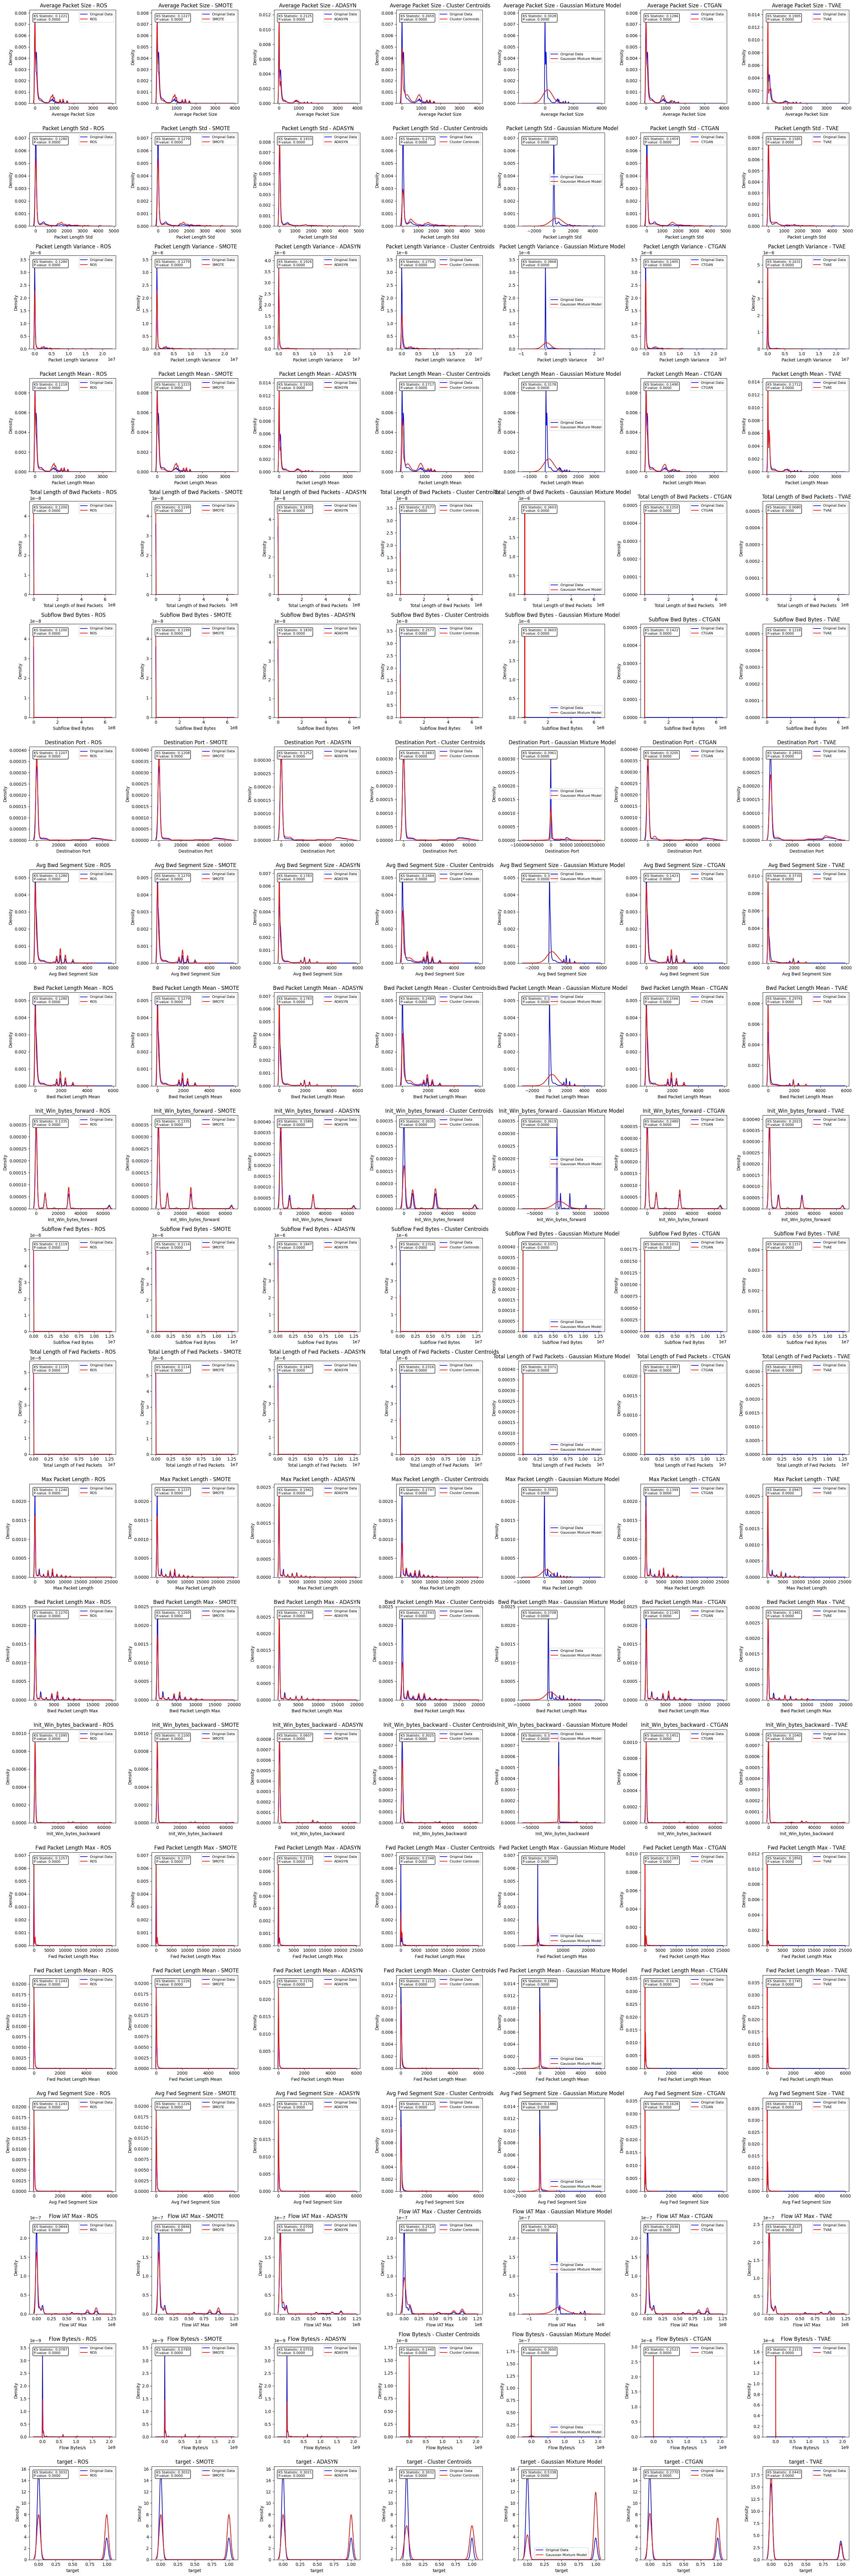

In [3]:


# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
synthetic_datasets = [data_ros, data_smote, data_adasyn, data_cc, data_gmm,
                    data_ctgan, data_tvae]
titles = ["ROS", "SMOTE", "ADASYN", "Cluster Centroids", 
          "Gaussian Mixture Model", "CTGAN", "TVAE"]

# Create a figure with subplots
num_features = len(features)
num_datasets = len(synthetic_datasets)
fig, axes = plt.subplots(num_features, num_datasets, figsize=(4 * num_datasets, 4 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    for j, (synthetic_data, title) in enumerate(zip(synthetic_datasets, titles)):
        # Perform KS test
        ks_statistic, p_value = stats.ks_2samp(df[feature], synthetic_data[feature])
        
        # Plot KDE for the original data
        sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i, j])
        
        # Plot KDE for the synthetic data
        sns.kdeplot(synthetic_data[feature], color='red', label=title, ax=axes[i, j])
        
        # Customize each subplot
        axes[i, j].set_title(f'{feature} - {title}', fontsize=12)
        axes[i, j].set_xlabel(feature, fontsize=10)
        axes[i, j].set_ylabel('Density', fontsize=10)
        axes[i, j].legend(fontsize=8)
        
        # Annotate with KS statistic and p-value
        axes[i, j].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
                        transform=axes[i, j].transAxes, fontsize=8, verticalalignment='top', 
                        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:

# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
synthetic_datasets = [data_ros, data_smote, data_adasyn, data_cc, data_gmm,
                    data_ctgan, data_tvae]
titles = ["ROS", "SMOTE", "ADASYN", "Cluster Centroids", 
          "Gaussian Mixture Model", "CTGAN", "TVAE"]

# Create a figure with subplots
num_features = len(features)
num_datasets = len(synthetic_datasets)
fig, axes = plt.subplots(num_features, num_datasets, figsize=(14 * num_datasets, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    for j, (synthetic_data, title) in enumerate(zip(synthetic_datasets, titles)):
        # Perform KS test
        ks_statistic, p_value = stats.ks_2samp(df[feature], synthetic_data[feature])
        
        # Plot KDE for the original data
        sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i, j])
        
        # Plot KDE for the synthetic data
        sns.kdeplot(synthetic_data[feature], color='red', label=title, ax=axes[i, j])
        
        # Customize each subplot
        axes[i, j].set_title(f'{feature} - Original Data vs {title}')
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel('Density')
        axes[i, j].legend()
        
        # Annotate with KS statistic and p-value
        #axes[i, j].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
         #               transform=axes[i, j].transAxes, fontsize=12, verticalalignment='top', 
          #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


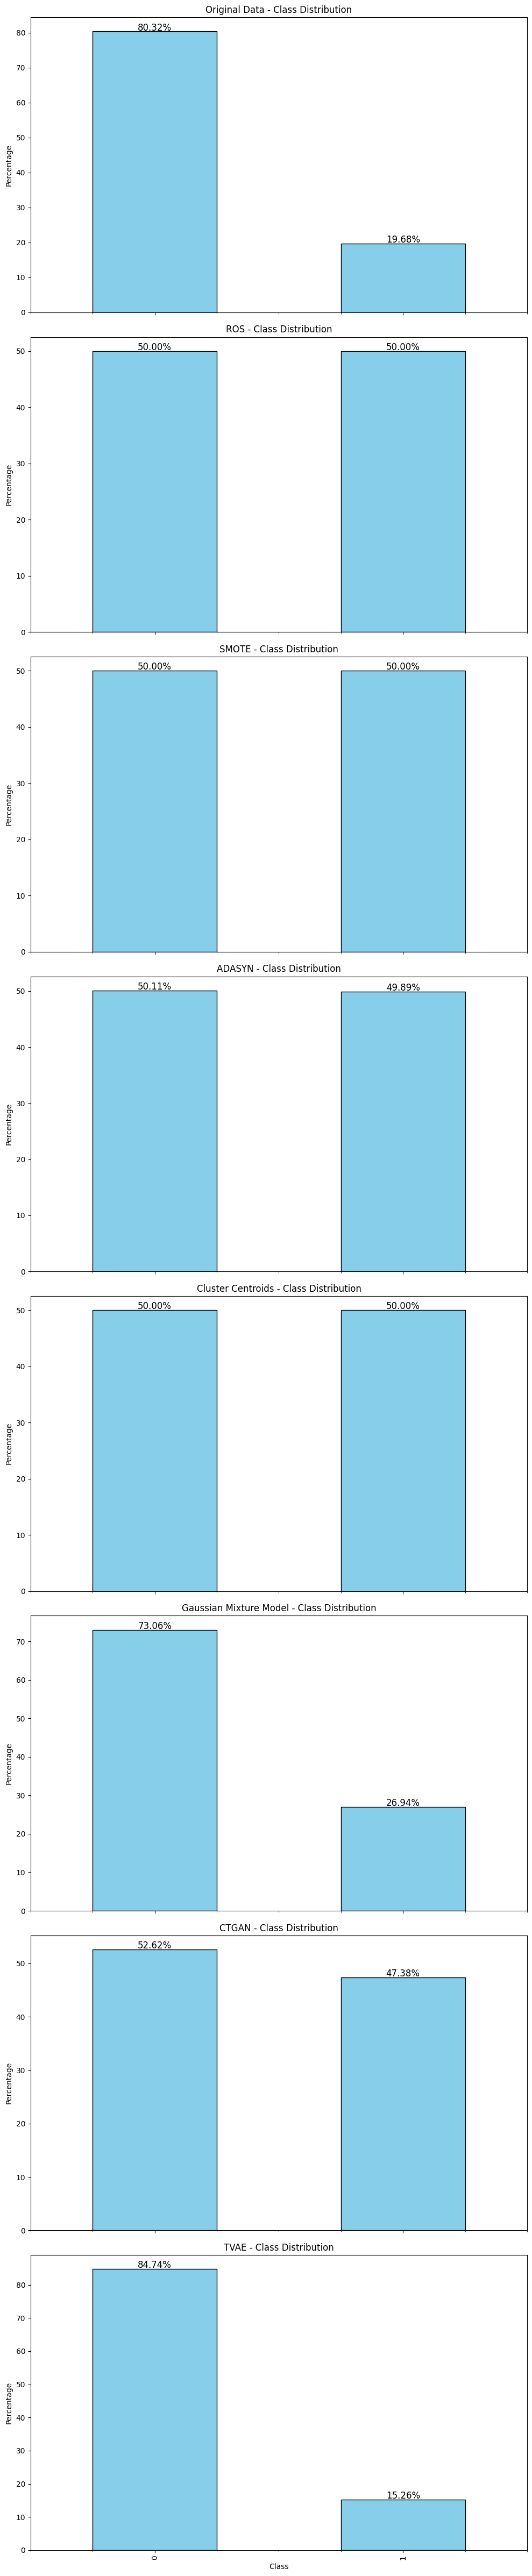


Original Data - Class Proportions:
target
0    80.318939
1    19.681061
Name: proportion, dtype: float64

ROS - Class Proportions:
target
0    50.0
1    50.0
Name: proportion, dtype: float64

SMOTE - Class Proportions:
target
0    50.0
1    50.0
Name: proportion, dtype: float64

ADASYN - Class Proportions:
target
0    50.109837
1    49.890163
Name: proportion, dtype: float64

Cluster Centroids - Class Proportions:
target
0    50.0
1    50.0
Name: proportion, dtype: float64

Gaussian Mixture Model - Class Proportions:
target
1    73.05903
0    26.94097
Name: proportion, dtype: float64

CTGAN - Class Proportions:
target
0    52.615815
1    47.384185
Name: proportion, dtype: float64

TVAE - Class Proportions:
target
0    84.744027
1    15.255973
Name: proportion, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# List of DataFrames and their titles
datasets = [df, data_ros, data_smote, data_adasyn, data_cc, data_gmm,
                       data_ctgan, data_tvae]
titles = ["Original Data","ROS", "SMOTE", "ADASYN", "Cluster Centroids", 
          "Gaussian Mixture Model", "CTGAN","TVAE"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Plotting class distribution
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 6 * len(datasets)), sharex=True)

for i, (data, title) in enumerate(zip(datasets, titles)):
    class_counts = data[target_column].value_counts(normalize=True) * 100  # Get class distribution in percentage
    class_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Annotate the bars with percentage values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                         textcoords='offset points')
    
    axes[i].set_title(f'{title} - Class Distribution')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

# Print the proportions numerically
for data, title in zip(datasets, titles):
    print(f"\n{title} - Class Proportions:")
    class_counts = data[target_column].value_counts(normalize=True) * 100
    print(class_counts)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Features and target for the original dataset
X_real = df.drop(columns=[target_column])
y_real = df[target_column]

# Split the original data into train and test sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Train and test on real data (TRTR)
model_real = RandomForestClassifier(random_state=42)
model_real.fit(X_train_real, y_train_real)
y_pred_real = model_real.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)
print(f'TRTR (Train and Test on Real) Accuracy: {accuracy_real:.4f}')

# Train on synthetic data and test on real data (TSTR)
accuracies = {}

for data, title in zip(datasets, titles):
    X_synth = data.drop(columns=[target_column])
    y_synth = data[target_column]
    
    # Reindex X_synth to match the order of X_test_real
    X_synth = X_synth.reindex(columns=X_test_real.columns)
    
    model_synth = RandomForestClassifier(random_state=42)
    model_synth.fit(X_synth, y_synth)  # Train on synthetic data
    y_pred_synth = model_synth.predict(X_test_real)  # Test on real data
    accuracy_synth = accuracy_score(y_test_real, y_pred_synth)
    accuracies[title] = accuracy_synth
    print(f'TSTR (Train on {title}, Test on Real) Accuracy: {accuracy_synth:.4f}')

# Compare accuracies
comparison_df = pd.DataFrame({'Dataset': ['TRTR'] + titles, 'Accuracy': [accuracy_real] + list(accuracies.values())})
print('\nAccuracy Comparison:')
print(comparison_df)


TRTR (Train and Test on Real) Accuracy: 0.9978
TSTR (Train on Original Data, Test on Real) Accuracy: 0.9996
TSTR (Train on ROS, Test on Real) Accuracy: 0.9991
TSTR (Train on SMOTE, Test on Real) Accuracy: 0.9990
TSTR (Train on ADASYN, Test on Real) Accuracy: 0.9986
TSTR (Train on Cluster Centroids, Test on Real) Accuracy: 0.9930
TSTR (Train on Gaussian Mixture Model, Test on Real) Accuracy: 0.4509
TSTR (Train on CTGAN, Test on Real) Accuracy: 0.9603
TSTR (Train on TVAE, Test on Real) Accuracy: 0.9718

Accuracy Comparison:
                  Dataset  Accuracy
0                    TRTR  0.997819
1           Original Data  0.999640
2                     ROS  0.999116
3                   SMOTE  0.998972
4                  ADASYN  0.998589
5       Cluster Centroids  0.992995
6  Gaussian Mixture Model  0.450853
7                   CTGAN  0.960295
8                    TVAE  0.971753


In [8]:
datasets = [df, data_ros, data_smote, data_adasyn, data_cc, data_gmm, data_ctgan, data_tvae]
titles = ["Original Data", "ROS", "SMOTE", "ADASYN", "Cluster Centroids", 
          "Gaussian Mixture Model", "CTGAN", "TVAE"]

for title, df in zip(titles, datasets):
    print(f"Dataset: {title}")
    print("Column-wise Min and Max values:")
    
    # Display the minimum values for each column
    print("Minimum values:")
    print(df.min())

    # Display the maximum values for each column
    print("\nMaximum values:")
    print(df.max())
    
    print("\n" + "="*50 + "\n")  # Add a separator between datasets for better readability


Dataset: Original Data
Column-wise Min and Max values:
Minimum values:
 Average Packet Size            0.000000e+00
 Packet Length Std              0.000000e+00
 Packet Length Variance         0.000000e+00
 Packet Length Mean             0.000000e+00
 Total Length of Bwd Packets    0.000000e+00
 Subflow Bwd Bytes              0.000000e+00
 Destination Port               0.000000e+00
 Avg Bwd Segment Size           0.000000e+00
 Bwd Packet Length Mean         0.000000e+00
Init_Win_bytes_forward         -1.000000e+00
 Subflow Fwd Bytes              0.000000e+00
Total Length of Fwd Packets     0.000000e+00
 Max Packet Length              0.000000e+00
Bwd Packet Length Max           0.000000e+00
 Init_Win_bytes_backward       -1.000000e+00
 Fwd Packet Length Max          0.000000e+00
 Fwd Packet Length Mean         0.000000e+00
 Avg Fwd Segment Size           0.000000e+00
 Flow IAT Max                  -1.300000e+01
Flow Bytes/s                   -5.559273e+06
target                       